!pip install git+https://github.com/CC-RMD-EpiBio/autoencirt.git

In [1]:
%pylab inline
import numpy as np
import sys
sys.path.append('../bayesianquilts')

import matplotlib.pyplot as plt


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from factor_analyzer import FactorAnalyzer

In [3]:
import tensorflow as tf
import autoencirt
from autoencirt.irt import GRModel, FactorizedGRModel
from autoencirt.data.rwa import item_text, get_data

dim = 2

In [4]:
pd_data = get_data(reorient=True, pandas=True)
responses = pd_data[0].iloc[:, :22]
fa = FactorAnalyzer(n_factors=dim)
fa.fit(responses)
loadings = fa.loadings_
loadings.shape


(22, 2)

In [5]:
tfdata, num_people = get_data(reorient=True)
item_names = [f"Q{j}" for j in range(1, 23)]
scale_indices = [
    [1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 20],
    [0, 2, 4, 6, 9, 11, 13, 16, 18, 21],
]
fgrm = FactorizedGRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    scale_indices=scale_indices,
    discrimination_guess=tf.cast(np.abs(loadings).T, tf.float64)[
        tf.newaxis, :, :, tf.newaxis
    ],
)

grm = GRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    discrimination_guess=tf.cast(np.abs(loadings).T, tf.float64)[
        tf.newaxis, :, :, tf.newaxis
    ],
)

batch_size = 241


def data_factory_factory(batch_size=batch_size, repeat=False, shuffle=False):
    def data_factory(batch_size=batch_size):
        if shuffle:
            out = tfdata.shuffle(batch_size * 10)
        else:
            out = tfdata

        if repeat:
            out = out.repeat()
        return out.batch(batch_size)

    return data_factory

In [6]:
losses = grm.fit(
            data_factory_factory(shuffle=True, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=3000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0015)

Running optimization for 3000 steps of 1 accumulated batches, checking every 41 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-1


  1%|▏         | 40/3000 [00:10<08:05,  6.09it/s] 

Step 41: average-batch loss:403466.2359400076 rel loss: 2.4785221436687765e+302
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-2


  3%|▎         | 81/3000 [00:16<06:32,  7.43it/s]

Step 82: average-batch loss:346283.51330005133 rel loss: 0.16513267436560863
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-3


  4%|▍         | 122/3000 [00:23<09:40,  4.96it/s]

Step 123: average-batch loss:362695.39895181125 rel loss: 0.04524977625630274
New learning rate: 0.001485


  5%|▌         | 163/3000 [00:29<07:33,  6.25it/s]

Step 164: average-batch loss:341669.18697545724 rel loss: 0.013505245718647573
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-4


  7%|▋         | 204/3000 [00:36<07:07,  6.54it/s]

Step 205: average-batch loss:343985.1723771645 rel loss: 0.0067328059105055274
New learning rate: 0.00147015


  8%|▊         | 245/3000 [00:42<07:00,  6.54it/s]

Step 246: average-batch loss:318151.06970486476 rel loss: 0.0739212264551216
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-5


 10%|▉         | 286/3000 [00:48<06:38,  6.80it/s]

Step 287: average-batch loss:287611.3768422144 rel loss: 0.10618388325926575
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-6


 11%|█         | 327/3000 [00:55<06:55,  6.43it/s]

Step 328: average-batch loss:323514.80360359384 rel loss: 0.11097923916140888
New learning rate: 0.0014554485


 12%|█▏        | 368/3000 [01:01<06:45,  6.48it/s]

Step 369: average-batch loss:285935.94357581175 rel loss: 0.005859470640347855
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-7


 14%|█▎        | 409/3000 [01:07<07:20,  5.88it/s]

Step 410: average-batch loss:312856.8119693168 rel loss: 0.08604852879516427
New learning rate: 0.001440894015


 15%|█▌        | 450/3000 [01:14<06:22,  6.66it/s]

Step 451: average-batch loss:282294.9636583587 rel loss: 0.012897785600806665
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-8


 16%|█▋        | 491/3000 [01:20<06:00,  6.96it/s]

Step 492: average-batch loss:253516.1740278509 rel loss: 0.11351855454928972
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-9


 18%|█▊        | 532/3000 [01:26<05:46,  7.12it/s]

Step 533: average-batch loss:238346.06603892945 rel loss: 0.0636474024557372
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-10


 19%|█▉        | 573/3000 [01:32<05:41,  7.10it/s]

Step 574: average-batch loss:224982.50656966382 rel loss: 0.059398215768067836
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-11


 20%|██        | 614/3000 [01:38<05:51,  6.79it/s]

Step 615: average-batch loss:228072.67336120218 rel loss: 0.01354904446024717
New learning rate: 0.0014264850748499998


 22%|██▏       | 655/3000 [01:44<05:23,  7.26it/s]

Step 656: average-batch loss:243255.81420000072 rel loss: 0.07511971580384469
New learning rate: 0.0014122202241015


 23%|██▎       | 696/3000 [01:49<05:19,  7.21it/s]

Step 697: average-batch loss:223781.28213725716 rel loss: 0.0053678503444710805
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-12


 25%|██▍       | 737/3000 [01:55<07:04,  5.33it/s]

Step 738: average-batch loss:232972.0710981199 rel loss: 0.03945017493960417
New learning rate: 0.001398098021860485


 26%|██▌       | 778/3000 [02:02<06:11,  5.98it/s]

Step 779: average-batch loss:206897.97132563108 rel loss: 0.08160210901755968
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-13


 27%|██▋       | 819/3000 [02:08<05:30,  6.60it/s]

Step 820: average-batch loss:180023.7178471154 rel loss: 0.14928173798376151
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-14


 29%|██▊       | 860/3000 [02:15<05:16,  6.76it/s]

Step 861: average-batch loss:175501.73953583644 rel loss: 0.025766002794266222
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-15


 30%|███       | 901/3000 [02:21<05:16,  6.62it/s]

Step 902: average-batch loss:175044.44730311888 rel loss: 0.002612434954452932
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-16


 31%|███▏      | 942/3000 [02:27<05:41,  6.03it/s]

Step 943: average-batch loss:173872.77289685787 rel loss: 0.006738688218632433
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-17


 33%|███▎      | 983/3000 [02:33<04:47,  7.01it/s]

Step 984: average-batch loss:119937.63958446335 rel loss: 0.4496931363603494
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-18


 34%|███▍      | 1024/3000 [02:39<04:44,  6.96it/s]

Step 1025: average-batch loss:170652.24729049843 rel loss: 0.2971810129151388
New learning rate: 0.00138411704164188


 36%|███▌      | 1065/3000 [02:45<04:26,  7.26it/s]

Step 1066: average-batch loss:148669.30273652554 rel loss: 0.19325888144495415
New learning rate: 0.0013702758712254614


 37%|███▋      | 1106/3000 [02:51<04:38,  6.81it/s]

Step 1107: average-batch loss:136573.31540893496 rel loss: 0.12180765894611399
New learning rate: 0.0013565731125132067


 38%|███▊      | 1147/3000 [02:57<04:23,  7.03it/s]

Step 1148: average-batch loss:131876.23452623223 rel loss: 0.09052878241980825
New learning rate: 0.0013430073813880746


 40%|███▉      | 1188/3000 [03:03<04:18,  7.00it/s]

Step 1189: average-batch loss:89045.85386847971 rel loss: 0.3469199785720586
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-19


 41%|████      | 1229/3000 [03:08<04:15,  6.93it/s]

Step 1230: average-batch loss:115035.48680839168 rel loss: 0.22592709137834555
New learning rate: 0.001329577307574194


 42%|████▏     | 1270/3000 [03:14<04:05,  7.05it/s]

Step 1271: average-batch loss:100328.81734241731 rel loss: 0.11245984725833462
New learning rate: 0.0013162815344984519


 44%|████▎     | 1311/3000 [03:20<03:53,  7.24it/s]

Step 1312: average-batch loss:96463.06002169772 rel loss: 0.07689167388583397
New learning rate: 0.0013031187191534673


 45%|████▌     | 1352/3000 [03:26<03:54,  7.04it/s]

Step 1353: average-batch loss:123924.45299115675 rel loss: 0.2814504989194181
New learning rate: 0.0012900875319619327


 46%|████▋     | 1393/3000 [03:32<03:44,  7.15it/s]

Step 1394: average-batch loss:109970.36037846161 rel loss: 0.19027405600900532
New learning rate: 0.0012771866566423133
We are in a loss plateau
Restoring from a checkpoint


 48%|████▊     | 1434/3000 [03:38<03:40,  7.09it/s]

Step 1435: average-batch loss:113958.5269917903 rel loss: 0.21861175096713326
New learning rate: 0.00126441479007589
We are in a loss plateau
Restoring from a checkpoint


 49%|████▉     | 1475/3000 [03:44<03:31,  7.20it/s]

Step 1476: average-batch loss:77019.54680322361 rel loss: 0.15614616762134395
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-20


 51%|█████     | 1516/3000 [03:50<03:28,  7.11it/s]

Step 1517: average-batch loss:71414.31168960586 rel loss: 0.07848896083995403
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-21


 52%|█████▏    | 1557/3000 [03:56<03:22,  7.12it/s]

Step 1558: average-batch loss:81321.83207054352 rel loss: 0.12183100317198052
New learning rate: 0.0012517706421751314


 53%|█████▎    | 1598/3000 [04:01<03:17,  7.10it/s]

Step 1599: average-batch loss:70070.92208742224 rel loss: 0.01917185563089322
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-22


 55%|█████▍    | 1639/3000 [04:07<03:20,  6.80it/s]

Step 1640: average-batch loss:95789.3141560234 rel loss: 0.268489155551428
New learning rate: 0.00123925293575338


 56%|█████▌    | 1680/3000 [04:13<03:05,  7.12it/s]

Step 1681: average-batch loss:84678.29001811947 rel loss: 0.17250428566249446
New learning rate: 0.0012268604063958462


 57%|█████▋    | 1721/3000 [04:19<02:59,  7.11it/s]

Step 1722: average-batch loss:61755.268254346614 rel loss: 0.13465497063062842
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-23


 59%|█████▊    | 1762/3000 [04:25<02:54,  7.11it/s]

Step 1763: average-batch loss:74078.09102438868 rel loss: 0.16634908647936172
New learning rate: 0.0012145918023318877


 60%|██████    | 1803/3000 [04:31<02:49,  7.06it/s]

Step 1804: average-batch loss:54486.69066068195 rel loss: 0.1334009738071638
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-24


 61%|██████▏   | 1844/3000 [04:36<02:43,  7.08it/s]

Step 1845: average-batch loss:51662.607334893706 rel loss: 0.05466397209652274
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-25


 63%|██████▎   | 1885/3000 [04:42<02:38,  7.04it/s]

Step 1886: average-batch loss:68823.45719190546 rel loss: 0.249345943333839
New learning rate: 0.0012024458843085688


 64%|██████▍   | 1926/3000 [04:48<02:38,  6.79it/s]

Step 1927: average-batch loss:72597.91538978783 rel loss: 0.28837340497298963
New learning rate: 0.001190421425465483


 66%|██████▌   | 1967/3000 [04:54<02:36,  6.58it/s]

Step 1968: average-batch loss:39647.13039693587 rel loss: 0.3030604439126432
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-26


 67%|██████▋   | 2008/3000 [05:00<02:30,  6.59it/s]

Step 2009: average-batch loss:43117.34414236469 rel loss: 0.08048301245018427
New learning rate: 0.0011785172112108281


 68%|██████▊   | 2049/3000 [05:06<02:15,  7.00it/s]

Step 2050: average-batch loss:23983.8547100213 rel loss: 0.653075824394896
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-27


 70%|██████▉   | 2090/3000 [05:12<02:12,  6.85it/s]

Step 2091: average-batch loss:30140.612841790746 rel loss: 0.2042678483044293
New learning rate: 0.00116673203909872


 71%|███████   | 2131/3000 [05:18<02:27,  5.88it/s]

Step 2132: average-batch loss:63452.231564868736 rel loss: 0.6220171597037997
New learning rate: 0.0011550647187077326


 72%|███████▏  | 2172/3000 [05:24<01:58,  7.00it/s]

Step 2173: average-batch loss:26587.980235625455 rel loss: 0.09794371375810132
New learning rate: 0.0011435140715206553


 74%|███████▍  | 2213/3000 [05:30<01:54,  6.88it/s]

Step 2214: average-batch loss:34649.63956496916 rel loss: 0.30781806070303214
New learning rate: 0.001132078930805449


 75%|███████▌  | 2254/3000 [05:36<02:01,  6.15it/s]

Step 2255: average-batch loss:61148.88917582954 rel loss: 0.6077793884193493
New learning rate: 0.0011207581414973942
We are in a loss plateau
Restoring from a checkpoint


 76%|███████▋  | 2295/3000 [05:42<01:41,  6.96it/s]

Step 2296: average-batch loss:41909.48544423521 rel loss: 0.4277225201933287
New learning rate: 0.0011095505600824203
We are in a loss plateau
Restoring from a checkpoint


 78%|███████▊  | 2336/3000 [05:47<01:35,  6.94it/s]

Step 2337: average-batch loss:42723.48574962981 rel loss: 0.4386259854691487
New learning rate: 0.0010984550544815962
We are in a loss plateau
Restoring from a checkpoint


 79%|███████▉  | 2377/3000 [05:53<01:26,  7.16it/s]

Step 2378: average-batch loss:30266.7700744295 rel loss: 0.207584600172327
New learning rate: 0.00108747050393678
We are in a loss plateau
Restoring from a checkpoint


 81%|████████  | 2418/3000 [05:59<01:20,  7.22it/s]

Step 2419: average-batch loss:36513.80591097169 rel loss: 0.3431565373245681
New learning rate: 0.0010765957988974125
We are in a loss plateau
Restoring from a checkpoint


 82%|████████▏ | 2459/3000 [06:05<01:15,  7.13it/s]

Step 2460: average-batch loss:22311.036538104374 rel loss: 0.07497716070071278
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-28


 83%|████████▎ | 2500/3000 [06:11<01:09,  7.23it/s]

Step 2501: average-batch loss:26458.28237224241 rel loss: 0.15674660115083452
New learning rate: 0.001065829840908438


 85%|████████▍ | 2541/3000 [06:17<01:04,  7.07it/s]

Step 2542: average-batch loss:36511.931434096296 rel loss: 0.38893847403346515
New learning rate: 0.0010551715424993537


 86%|████████▌ | 2582/3000 [06:23<01:05,  6.43it/s]

Step 2583: average-batch loss:32864.922359616736 rel loss: 0.3211291877104997
New learning rate: 0.0010446198270743603


 87%|████████▋ | 2623/3000 [06:28<00:54,  6.95it/s]

Step 2624: average-batch loss:29241.588638589143 rel loss: 0.2370101086552716
New learning rate: 0.0010341736288036166


 89%|████████▉ | 2664/3000 [06:34<00:47,  7.14it/s]

Step 2665: average-batch loss:28927.700839555495 rel loss: 0.22873108160754863
New learning rate: 0.0010238318925155805
We are in a loss plateau
Restoring from a checkpoint


 90%|█████████ | 2705/3000 [06:40<00:42,  6.90it/s]

Step 2706: average-batch loss:22171.44850028024 rel loss: 0.006295846562409766
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-29


 92%|█████████▏| 2746/3000 [06:46<00:37,  6.80it/s]

Step 2747: average-batch loss:20048.91488897136 rel loss: 0.10586775509114736
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-30


 93%|█████████▎| 2787/3000 [06:52<00:30,  6.98it/s]

Step 2788: average-batch loss:22418.72821146564 rel loss: 0.10570685812954736
New learning rate: 0.0010135935735904246


 94%|█████████▍| 2828/3000 [06:58<00:24,  7.14it/s]

Step 2829: average-batch loss:24113.42193071051 rel loss: 0.168557870111444
New learning rate: 0.0010034576378545204


 96%|█████████▌| 2869/3000 [07:04<00:18,  7.02it/s]

Step 2870: average-batch loss:23690.88710166679 rel loss: 0.15372882395945384
New learning rate: 0.0009934230614759751


 97%|█████████▋| 2910/3000 [07:10<00:13,  6.86it/s]

Step 2911: average-batch loss:17705.494105199366 rel loss: 0.13235557109269433
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986/328dac9c-bd4c-4fd0-8739-5d2bf7ffd986-31


 98%|█████████▊| 2951/3000 [07:16<00:06,  7.27it/s]

Step 2952: average-batch loss:20509.99958296844 rel loss: 0.13673844635754862
New learning rate: 0.0009834888308612154


100%|█████████▉| 2992/3000 [07:22<00:01,  7.22it/s]

Step 2993: average-batch loss:23321.913020956 rel loss: 0.24082153598248895
New learning rate: 0.0009736539425526032


100%|██████████| 3000/3000 [07:23<00:00,  7.25it/s]

Terminating because we are out of iterations


100%|██████████| 3000/3000 [07:23<00:00,  6.77it/s]


In [7]:
losses = grm.fit(
            data_factory_factory(shuffle=False, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=3000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0005)

Running optimization for 3000 steps of 1 accumulated batches, checking every 41 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-1


  0%|          | 0/3000 [00:00<?, ?it/s]

  1%|▏         | 40/3000 [00:07<07:26,  6.63it/s] 

Step 41: average-batch loss:14605.799882478432 rel loss: 6.846595243302155e+303
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-2


  3%|▎         | 81/3000 [00:13<07:21,  6.60it/s]

Step 82: average-batch loss:27656.553518306093 rel loss: 0.47188647808879236
New learning rate: 0.000495


  4%|▍         | 122/3000 [00:18<06:57,  6.90it/s]

Step 123: average-batch loss:14614.90412330443 rel loss: 0.0006229422204337893
New learning rate: 0.00049005


  5%|▌         | 163/3000 [00:24<07:02,  6.72it/s]

Step 164: average-batch loss:14941.739753865417 rel loss: 0.02248331699794715
New learning rate: 0.00048514950000000005


  7%|▋         | 204/3000 [00:30<06:42,  6.95it/s]

Step 205: average-batch loss:24475.036848379154 rel loss: 0.40323685831567224
New learning rate: 0.00048029800499999997


  8%|▊         | 245/3000 [00:36<06:38,  6.91it/s]

Step 246: average-batch loss:17476.600751344446 rel loss: 0.16426540319319063
New learning rate: 0.00047549502494999995
We are in a loss plateau
Restoring from a checkpoint


 10%|▉         | 286/3000 [00:41<06:35,  6.86it/s]

Step 287: average-batch loss:33014.30923658461 rel loss: 0.5575918375934669
New learning rate: 0.0004707400747005
We are in a loss plateau
Restoring from a checkpoint


 11%|█         | 327/3000 [00:47<06:22,  6.99it/s]

Step 328: average-batch loss:18181.651959947056 rel loss: 0.19667366229130243
New learning rate: 0.00046603267395349497
We are in a loss plateau
Restoring from a checkpoint


 12%|█▏        | 368/3000 [00:53<06:18,  6.95it/s]

Step 369: average-batch loss:15177.031781520964 rel loss: 0.037637919407801756
New learning rate: 0.00046137234721396004
We are in a loss plateau
Restoring from a checkpoint


 14%|█▎        | 409/3000 [00:58<06:21,  6.78it/s]

Step 410: average-batch loss:12471.558796176818 rel loss: 0.17112865530136218
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-3


 15%|█▌        | 450/3000 [01:04<06:10,  6.87it/s]

Step 451: average-batch loss:12292.743016794317 rel loss: 0.01454645062848898
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-4


 16%|█▋        | 491/3000 [01:10<06:04,  6.88it/s]

Step 492: average-batch loss:16819.840334692773 rel loss: 0.2691522171325741
New learning rate: 0.00045675862374182043


 18%|█▊        | 532/3000 [01:16<06:07,  6.72it/s]

Step 533: average-batch loss:14893.600646998893 rel loss: 0.1746292043038402
New learning rate: 0.0004521910375044022


 19%|█▉        | 573/3000 [01:22<05:40,  7.14it/s]

Step 574: average-batch loss:15433.191343585864 rel loss: 0.20348664491202195
New learning rate: 0.0004476691271293582


 20%|██        | 614/3000 [01:28<05:54,  6.73it/s]

Step 615: average-batch loss:29827.342789146664 rel loss: 0.5878699921849122
New learning rate: 0.0004431924358580646


 22%|██▏       | 655/3000 [01:34<05:52,  6.65it/s]

Step 656: average-batch loss:18088.591936771423 rel loss: 0.32041459834112385
New learning rate: 0.00043876051149948394
We are in a loss plateau
Restoring from a checkpoint


 23%|██▎       | 696/3000 [01:40<05:30,  6.98it/s]

Step 697: average-batch loss:13924.747017152727 rel loss: 0.11720169841133071
New learning rate: 0.00043437290638448915
We are in a loss plateau
Restoring from a checkpoint


 25%|██▍       | 737/3000 [01:45<05:30,  6.84it/s]

Step 738: average-batch loss:23833.947013148805 rel loss: 0.48423385308305805
New learning rate: 0.00043002917732064424
We are in a loss plateau
Restoring from a checkpoint


 26%|██▌       | 778/3000 [01:51<05:27,  6.79it/s]

Step 779: average-batch loss:12877.022108785914 rel loss: 0.04537377408034012
New learning rate: 0.0004257288855474378
We are in a loss plateau
Restoring from a checkpoint


 27%|██▋       | 819/3000 [01:57<05:14,  6.93it/s]

Step 820: average-batch loss:18706.67103765242 rel loss: 0.3428684883562808
New learning rate: 0.0004214715966919634
We are in a loss plateau
Restoring from a checkpoint


 29%|██▊       | 860/3000 [02:03<05:12,  6.86it/s]

Step 861: average-batch loss:19848.09278752435 rel loss: 0.3806587288567594
New learning rate: 0.00041725688072504375
We are in a loss plateau
Restoring from a checkpoint


 30%|███       | 901/3000 [02:09<05:06,  6.85it/s]

Step 902: average-batch loss:16486.455065834998 rel loss: 0.2543731828518638
New learning rate: 0.00041308431191779333
We are in a loss plateau
Restoring from a checkpoint


 31%|███▏      | 942/3000 [02:15<05:01,  6.82it/s]

Step 943: average-batch loss:15255.156916429904 rel loss: 0.1941909818341526
New learning rate: 0.00040895346879861536
We are in a loss plateau
Restoring from a checkpoint


 33%|███▎      | 983/3000 [02:20<04:52,  6.91it/s]

Step 984: average-batch loss:21787.4516150341 rel loss: 0.435787937295434
New learning rate: 0.0004048639341106292
We are in a loss plateau
Restoring from a checkpoint


 34%|███▍      | 1024/3000 [02:26<04:48,  6.84it/s]

Step 1025: average-batch loss:12140.443823540703 rel loss: 0.012544779702229699
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-5


 36%|███▌      | 1065/3000 [02:32<04:45,  6.79it/s]

Step 1066: average-batch loss:14462.770153468657 rel loss: 0.16057271914612994
New learning rate: 0.0004008152947695229


 37%|███▋      | 1106/3000 [02:38<04:32,  6.94it/s]

Step 1107: average-batch loss:11344.17763720515 rel loss: 0.07019161827333024
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-6


 38%|███▊      | 1147/3000 [02:44<04:28,  6.89it/s]

Step 1148: average-batch loss:12915.814316602313 rel loss: 0.12168312743370285
New learning rate: 0.0003968071418218277


 40%|███▉      | 1188/3000 [02:50<04:29,  6.73it/s]

Step 1189: average-batch loss:15016.857111531648 rel loss: 0.24457044820025609
New learning rate: 0.0003928390704036094


 41%|████      | 1229/3000 [02:55<04:21,  6.78it/s]

Step 1230: average-batch loss:16366.099548027643 rel loss: 0.306849038531463
New learning rate: 0.00038891067969957333


 42%|████▏     | 1270/3000 [03:01<04:12,  6.84it/s]

Step 1271: average-batch loss:17407.47637290817 rel loss: 0.3483157814385739
New learning rate: 0.0003850215729025776


 44%|████▎     | 1311/3000 [03:07<04:05,  6.88it/s]

Step 1312: average-batch loss:12191.121340606554 rel loss: 0.06947217403048717
New learning rate: 0.0003811713571735518
We are in a loss plateau
Restoring from a checkpoint


 45%|████▌     | 1352/3000 [03:13<04:02,  6.79it/s]

Step 1353: average-batch loss:16002.770166481245 rel loss: 0.2911116313495394
New learning rate: 0.0003773596436018163
We are in a loss plateau
Restoring from a checkpoint


 46%|████▋     | 1393/3000 [03:19<03:51,  6.94it/s]

Step 1394: average-batch loss:13314.468671269551 rel loss: 0.1479811987027291
New learning rate: 0.0003735860471657981
We are in a loss plateau
Restoring from a checkpoint


 48%|████▊     | 1434/3000 [03:25<03:48,  6.85it/s]

Step 1435: average-batch loss:10364.292109954644 rel loss: 0.0945443757137403
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-7


 49%|████▉     | 1475/3000 [03:30<03:42,  6.85it/s]

Step 1476: average-batch loss:17307.59748069514 rel loss: 0.4011709527266882
New learning rate: 0.0003698501866941401


 51%|█████     | 1516/3000 [03:36<03:33,  6.96it/s]

Step 1517: average-batch loss:12441.502659057049 rel loss: 0.16695817266013738
New learning rate: 0.00036615168482719875


 52%|█████▏    | 1557/3000 [03:42<03:27,  6.95it/s]

Step 1558: average-batch loss:21594.13269951669 rel loss: 0.5200412883363168
New learning rate: 0.0003624901679789267


 53%|█████▎    | 1598/3000 [03:48<03:19,  7.01it/s]

Step 1599: average-batch loss:11181.160101640107 rel loss: 0.07305753466186762
New learning rate: 0.00035886526629913746


 55%|█████▍    | 1639/3000 [03:53<03:30,  6.46it/s]

Step 1640: average-batch loss:12453.86095378419 rel loss: 0.16778482203903328
New learning rate: 0.00035527661363614604
We are in a loss plateau
Restoring from a checkpoint


 56%|█████▌    | 1680/3000 [03:59<03:12,  6.85it/s]

Step 1681: average-batch loss:15959.254316866543 rel loss: 0.3505779214884032
New learning rate: 0.00035172384749978456
We are in a loss plateau
Restoring from a checkpoint


 57%|█████▋    | 1721/3000 [04:05<03:04,  6.93it/s]

Step 1722: average-batch loss:21700.985825320895 rel loss: 0.5224045491121653
New learning rate: 0.00034820660902478676
We are in a loss plateau
Restoring from a checkpoint


 59%|█████▊    | 1762/3000 [04:11<03:00,  6.84it/s]

Step 1763: average-batch loss:19080.285460572275 rel loss: 0.4568062343002395
New learning rate: 0.0003447245429345389
We are in a loss plateau
Restoring from a checkpoint


 60%|██████    | 1803/3000 [04:17<02:58,  6.72it/s]

Step 1804: average-batch loss:14820.788576518902 rel loss: 0.30069226367784796
New learning rate: 0.00034127729750519346
We are in a loss plateau
Restoring from a checkpoint


 61%|██████▏   | 1844/3000 [04:23<02:48,  6.84it/s]

Step 1845: average-batch loss:9208.904929786862 rel loss: 0.12546412293068623
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-8


 63%|██████▎   | 1885/3000 [04:28<02:39,  7.01it/s]

Step 1886: average-batch loss:15196.449827167402 rel loss: 0.394009453884178
New learning rate: 0.00033786452453014155


 64%|██████▍   | 1926/3000 [04:34<02:38,  6.77it/s]

Step 1927: average-batch loss:12112.667486787643 rel loss: 0.23972940396227096
New learning rate: 0.0003344858792848401


 66%|██████▌   | 1967/3000 [04:40<02:28,  6.94it/s]

Step 1968: average-batch loss:14023.317389348525 rel loss: 0.3433148039007141
New learning rate: 0.00033114102049199175


 67%|██████▋   | 2008/3000 [04:46<02:23,  6.91it/s]

Step 2009: average-batch loss:10617.243092688252 rel loss: 0.13264631417088546
New learning rate: 0.0003278296102870718


 68%|██████▊   | 2049/3000 [04:51<02:17,  6.94it/s]

Step 2050: average-batch loss:10291.30003062273 rel loss: 0.10517574044242214
New learning rate: 0.0003245513141842011
We are in a loss plateau
Restoring from a checkpoint


 70%|██████▉   | 2090/3000 [04:57<02:14,  6.75it/s]

Step 2091: average-batch loss:21637.18079975268 rel loss: 0.5743944178766522
New learning rate: 0.00032130580104235905
We are in a loss plateau
Restoring from a checkpoint


 71%|███████   | 2131/3000 [05:03<02:06,  6.87it/s]

Step 2132: average-batch loss:9655.22275890963 rel loss: 0.04622553412461815
New learning rate: 0.0003180927430319355
We are in a loss plateau
Restoring from a checkpoint


 72%|███████▏  | 2172/3000 [05:09<02:00,  6.89it/s]

Step 2173: average-batch loss:10939.824379201887 rel loss: 0.15822186804988767
New learning rate: 0.00031491181560161616
We are in a loss plateau
Restoring from a checkpoint


 74%|███████▍  | 2213/3000 [05:15<02:00,  6.55it/s]

Step 2214: average-batch loss:9580.269116517089 rel loss: 0.03876343996328532
New learning rate: 0.00031176269744559996
We are in a loss plateau
Restoring from a checkpoint


 75%|███████▌  | 2254/3000 [05:21<01:51,  6.69it/s]

Step 2255: average-batch loss:12941.173251208082 rel loss: 0.2884026238558243
New learning rate: 0.00030864507047114397
We are in a loss plateau
Restoring from a checkpoint


 76%|███████▋  | 2295/3000 [05:27<01:43,  6.81it/s]

Step 2296: average-batch loss:13778.444017785467 rel loss: 0.33164405807362285
New learning rate: 0.0003055586197664325
We are in a loss plateau
Restoring from a checkpoint


 78%|███████▊  | 2336/3000 [05:32<01:35,  6.92it/s]

Step 2337: average-batch loss:10849.002162667522 rel loss: 0.15117493832975673
New learning rate: 0.0003025030335687682
We are in a loss plateau
Restoring from a checkpoint


 79%|███████▉  | 2377/3000 [05:38<01:29,  6.96it/s]

Step 2378: average-batch loss:9222.359449886393 rel loss: 0.0014589021575922769
New learning rate: 0.0002994780032330805
We are in a loss plateau
Restoring from a checkpoint


 81%|████████  | 2418/3000 [05:44<01:29,  6.49it/s]

Step 2419: average-batch loss:10498.529020770842 rel loss: 0.12283855085150688
New learning rate: 0.0002964832232007497
We are in a loss plateau
Restoring from a checkpoint


 82%|████████▏ | 2459/3000 [05:50<01:19,  6.78it/s]

Step 2460: average-batch loss:10146.810204003741 rel loss: 0.09243350918762616
New learning rate: 0.00029351839096874223
We are in a loss plateau
Restoring from a checkpoint


 83%|████████▎ | 2500/3000 [05:56<01:12,  6.92it/s]

Step 2501: average-batch loss:11891.563907203825 rel loss: 0.22559345417904425
New learning rate: 0.00029058320705905476
We are in a loss plateau
Restoring from a checkpoint


 85%|████████▍ | 2541/3000 [06:01<01:06,  6.89it/s]

Step 2542: average-batch loss:11423.948451179273 rel loss: 0.19389474058452666
New learning rate: 0.00028767737498846423
We are in a loss plateau
Restoring from a checkpoint


 86%|████████▌ | 2582/3000 [06:07<01:00,  6.90it/s]

Step 2583: average-batch loss:10865.987067496715 rel loss: 0.15250175869127075
New learning rate: 0.0002848006012385796
We are in a loss plateau
Restoring from a checkpoint


 87%|████████▋ | 2623/3000 [06:13<00:55,  6.78it/s]

Step 2624: average-batch loss:9097.025906860497 rel loss: 0.0122984175346793
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-9


 89%|████████▉ | 2664/3000 [06:19<00:51,  6.59it/s]

Step 2665: average-batch loss:14131.091590807366 rel loss: 0.35624039739588526
New learning rate: 0.0002819525952261938


 90%|█████████ | 2705/3000 [06:25<00:43,  6.84it/s]

Step 2706: average-batch loss:14673.975110506897 rel loss: 0.3800571529968848
New learning rate: 0.00027913306927393185


 92%|█████████▏| 2746/3000 [06:30<00:36,  6.95it/s]

Step 2747: average-batch loss:9665.22762135915 rel loss: 0.05878823932123297
New learning rate: 0.00027634173858119256


 93%|█████████▎| 2787/3000 [06:36<00:30,  6.89it/s]

Step 2788: average-batch loss:10919.947351460683 rel loss: 0.16693500306632403
New learning rate: 0.00027357832119538064


 94%|█████████▍| 2828/3000 [06:42<00:24,  6.91it/s]

Step 2829: average-batch loss:11126.9093316665 rel loss: 0.18243012181550536
New learning rate: 0.0002708425379834268
We are in a loss plateau
Restoring from a checkpoint


 96%|█████████▌| 2869/3000 [06:48<00:19,  6.84it/s]

Step 2870: average-batch loss:12450.884855892255 rel loss: 0.26936711630134286
New learning rate: 0.00026813411260359247
We are in a loss plateau
Restoring from a checkpoint


 97%|█████████▋| 2910/3000 [06:54<00:12,  6.92it/s]

Step 2911: average-batch loss:11349.711985727234 rel loss: 0.19847958095320736
New learning rate: 0.0002654527714775566
We are in a loss plateau
Restoring from a checkpoint


 98%|█████████▊| 2951/3000 [07:00<00:07,  6.95it/s]

Step 2952: average-batch loss:8911.72388464475 rel loss: 0.020793061433942
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/23c1249c-4e89-4386-8bc8-c4df6e9d582d/23c1249c-4e89-4386-8bc8-c4df6e9d582d-10


100%|█████████▉| 2992/3000 [07:05<00:01,  5.45it/s]

Step 2993: average-batch loss:10535.894264536943 rel loss: 0.15415591112745233
New learning rate: 0.000262798243762781


100%|██████████| 3000/3000 [07:07<00:00,  6.90it/s]

Terminating because we are out of iterations


100%|██████████| 3000/3000 [07:07<00:00,  7.02it/s]


In [8]:
params = grm.sample(256)
discrim = params['discriminations']
discrim.shape

TensorShape([256, 1, 2, 22, 1])

In [9]:
discrim_mean = np.mean(discrim, axis=0)

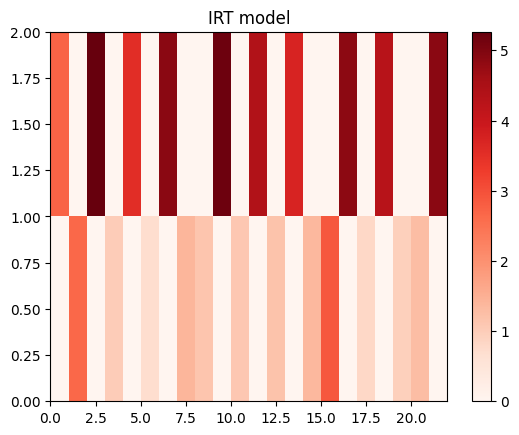

In [10]:
plt.pcolormesh(discrim_mean[0, ..., 0], vmin=0, cmap='Reds')
_ = plt.colorbar()
_ = plt.title("IRT model")

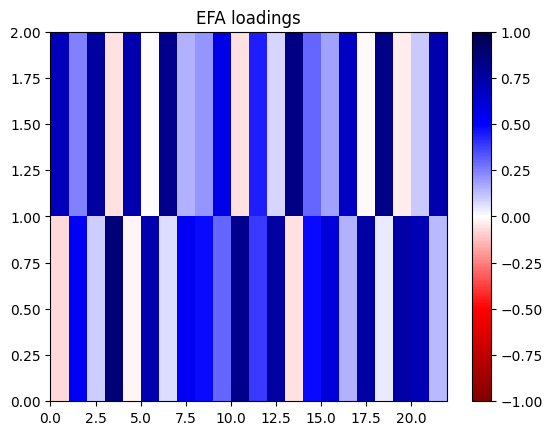

In [11]:
plt.pcolormesh(loadings.T, cmap="seismic_r", vmin=-1, vmax=1)
plt.colorbar()
_ = plt.title("EFA loadings")

In [12]:
discrim_mean[0, ..., 0]

array([[2.12253338e-03, 2.65561768e+00, 7.08433483e-03, 1.02577042e+00,
        1.41793734e-03, 7.00419686e-01, 5.23817802e-03, 1.41498319e+00,
        1.14751730e+00, 1.06846240e-02, 1.09325324e+00, 9.59392752e-03,
        1.18344718e+00, 2.92055844e-03, 1.37441006e+00, 2.88462710e+00,
        1.00256012e-02, 8.15916318e-01, 2.35247564e-03, 9.65113097e-01,
        1.28114662e+00, 7.34065017e-03],
       [2.72412926e+00, 5.76768282e-03, 5.26566462e+00, 1.91148275e-03,
        3.53946885e+00, 6.69104360e-05, 4.89027250e+00, 3.72058083e-03,
        4.98957100e-03, 5.19182312e+00, 2.32705116e-03, 4.39845598e+00,
        2.32693794e-03, 3.72345931e+00, 3.78461892e-03, 6.36568432e-03,
        4.86470435e+00, 3.78131627e-04, 4.27928497e+00, 1.41270750e-03,
        2.78759645e-03, 4.87542257e+00]])

In [13]:
scale_indices = [np.where(discrim_mean[0, ..., 0][0, :] > .5)[0].tolist()]
scale_indices += [[i for i in range(22) if i not in scale_indices[0]]]
scale_indices

[[1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 20],
 [0, 2, 4, 6, 9, 11, 13, 16, 18, 21]]

In [14]:
params.keys()

dict_keys(['mu', 'kappa_a', 'kappa', 'eta', 'discriminations', 'difficulties0', 'ddifficulties', 'abilities'])

# Build fully factorized model

In [15]:
fgrm = FactorizedGRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    scale_indices=scale_indices,
    discrimination_guess=tf.cast(np.abs(loadings).T, tf.float64)[tf.newaxis, :, :, tf.newaxis]
)

In [16]:
fparams = fgrm.sample(5)

In [17]:
fparams
batch_shape = 5

In [18]:
fgrm.num_items

22

In [19]:
p_shape = fparams['discriminations_0'].shape.as_list()
p_shape

[5, 1, 1, 12, 1]

In [20]:
fparams['discriminations_0']

<tf.Tensor: shape=(5, 1, 1, 12, 1), dtype=float64, numpy=
array([[[[[0.50420097],
          [0.88353521],
          [0.71488519],
          [0.53141086],
          [0.45931452],
          [0.78147849],
          [0.76144546],
          [0.47691672],
          [0.57007654],
          [0.7977078 ],
          [0.72265439],
          [0.69540304]]]],



       [[[[0.54208099],
          [0.87993931],
          [0.72769808],
          [0.51578078],
          [0.50168164],
          [0.79412181],
          [0.698733  ],
          [0.46524369],
          [0.62835911],
          [0.71712864],
          [0.7840023 ],
          [0.68616797]]]],



       [[[[0.52954111],
          [0.88447535],
          [0.73304799],
          [0.50289789],
          [0.46502138],
          [0.82865769],
          [0.7491307 ],
          [0.50335416],
          [0.64937354],
          [0.73926198],
          [0.75218081],
          [0.75938399]]]],



       [[[[0.53663759],
          [0.90275076],
          [0

In [26]:
dis_shape = p_shape[:-3] + [fgrm.dim] + [fgrm.num_items, 1]
dis_shape

[5, 1, 2, 22, 1]

In [36]:
dis_shape =  [fgrm.dim] + [fgrm.num_items, 1] + p_shape[:-3]


In [37]:
scatter_ndx = [[0, j] for j in fgrm.scale_indices[0]]
scatter_ndx

[[0, 1],
 [0, 3],
 [0, 5],
 [0, 7],
 [0, 8],
 [0, 10],
 [0, 12],
 [0, 14],
 [0, 15],
 [0, 17],
 [0, 19],
 [0, 20]]

In [38]:
fparams['discriminations_0'].shape

TensorShape([5, 1, 1, 12, 1])

In [39]:
tf.scatter_nd(
    scatter_ndx,
    tf.transpose(fparams['discriminations_0'], [2, 3, 4, 0, 1]),
    shape=dis_shape)

2024-03-26 17:46:56.338784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Dimensions [0,1) of indices[shape=[12,2]] must match dimensions [0,1) of updates[shape=[1,12,1,5,1]]


InvalidArgumentError: {{function_node __wrapped__ScatterNd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Dimensions [0,1) of indices[shape=[12,2]] must match dimensions [0,1) of updates[shape=[1,12,1,5,1]] [Op:ScatterNd]